**Gregg Maloy  
Data 602  
Assignment 10**

In [73]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn.datasets import load_iris
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#from sklearn.preprocessing import LabelEncoder

In [74]:
#load data
iris = ds.load_iris()

1. Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [75]:
#df with first 5 rows
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
#list of target names
target_names = iris.target_names.tolist()
target_names

['setosa', 'versicolor', 'virginica']

2. Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
i.e. return setosa instead of 0).

In [77]:
#create df 
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

#assign y
y=iris_df["target"].values
#assign X
X=iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values

#knn model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

#fit model
knn_model.fit(X, y)

#predict new values
new_observations=knn_model.predict(X)

#dictionary to map flower name
target_names_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

#replce numbers with flower name
iris_df['new_observations'] = [target_names_dict[label] for label in new_observations]

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,new_observations
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


3. Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split. Fit KNN with the training data with number of neighbors equal to the function parameter neighbors. Generate and return back an accuracy score using the test data that was split out

In [78]:
from sklearn.model_selection import train_test_split
    
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
    
#KNN 
knn_model = KNeighborsClassifier(n_neighbors=30)

#Fit and accuracy
knn_model.fit(X_train, y_train)
accuracy = knn_model.score(X_test, y_test)
print(accuracy)

0.9555555555555556


4. Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [79]:
train_accuracies={}
test_accuracies={}
neighbors=np.arange(1,30)
for neighbor in neighbors:
        knn=KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(X_train,y_train)
        train_accuracies[neighbor]=knn.score(X_train,y_train)
        test_accuracies[neighbor]= knn.score(X_test,y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

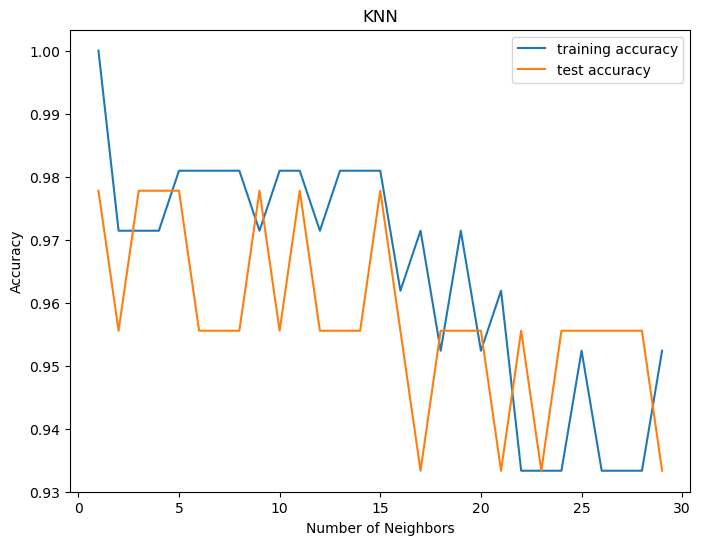

In [80]:
plt.figure(figsize=(8,6))
plt.title("KNN")
plt.plot(neighbors,train_accuracies.values(),label="training accuracy")
plt.plot(neighbors,test_accuracies.values(),label="test accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show